<a href="https://colab.research.google.com/github/seayrj/Projects/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os.path

DATA_FILE_GITHUB = "C:/Users/rylan/Downloads/HackathonTestDay.csv"
DEFAULT_FILE_NAME = 'HackathonTestDay.csv'
fileName = DEFAULT_FILE_NAME

if not os.path.exists(fileName):

  from google.colab import files
  uploaded = files.upload()



print("Reading file:", fileName)


with open(fileName, "r") as myfile:
    file_input = myfile.read()

Reading file: HackathonTestDay.csv


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import duckdb
import pandas as pd

In [5]:
df = pd.read_csv(fileName)
df = df.rename(columns={'Call Date Time': 'Date', 'answer_secs' : 'a', 'Duration Secs' : 'd', 'Hold Secs' : 'h', 'Setup Secs' : 's' , 'Queue Secs' : 'q', 'Release Secs' : 'r', 'Ring Secs' : 'R', 'Talk Secs' : 't','Call Day': 'cd'})
print(df)

                              Date  Answer Secs    d  h  s   q  r   R    t  \
0         Monday, November 1, 2021            0   20  0  0   0  0   0   20   
1         Monday, November 1, 2021            4  127  0  3   1  0   0  123   
2         Monday, November 1, 2021           33  117  0  0  15  0  18   84   
3         Monday, November 1, 2021            7  232  0  0   6  0   1  225   
4         Monday, November 1, 2021            7  324  0  0   7  1   0  317   
...                            ...          ...  ... .. ..  .. ..  ..  ...   
98079  Thursday, February 10, 2022            4  147  0  3   0  1   1  143   
98080  Thursday, February 10, 2022            4  145  0  3   1  1   0  141   
98081  Thursday, February 10, 2022           44  127  0  3  41  0   0   83   
98082  Thursday, February 10, 2022            0  160  0  0   0  0   0  160   
98083  Thursday, February 10, 2022            0   85  0  0   0  0   0   85   

             cd  
0        Monday  
1        Monday  
2        

In [6]:
numcalls = len(df.index)
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['cd'] = pd.Categorical(df['cd'], categories=custom_order, ordered=True)
df = df.sort_values('cd')
print(df)

                            Date  Answer Secs    d  h  s   q  r   R    t  \
0       Monday, November 1, 2021            0   20  0  0   0  0   0   20   
40640  Monday, November 29, 2021            0  140  0  0   0  1   0  140   
40639  Monday, November 29, 2021            0    0  0  0   0  0   0    0   
40638  Monday, November 29, 2021           38   38  0  3   0  0  35    0   
40637  Monday, November 29, 2021            0   73  0  0   0  0   0   73   
...                          ...          ...  ... .. ..  .. ..  ..  ...   
69863  Sunday, December 19, 2021           11  311  0  6   0  0   5  300   
69862  Sunday, December 19, 2021            0  253  0  0   0  0   0  253   
69861  Sunday, December 19, 2021            0   24  0  0   0  0   0   24   
69871  Sunday, December 19, 2021           39  179  0  0  14  0  25  140   
59539  Sunday, December 12, 2021            0   31  0  0   0  0   0   31   

           cd  
0      Monday  
40640  Monday  
40639  Monday  
40638  Monday  
40637  

Means:

In [7]:
meanslist = []
Answer = float(df['Answer Secs'].mean())
meanslist.append(Answer)
Duration = float(df['d'].mean())
meanslist.append(Duration)
Hold = float(df['h'].mean())
meanslist.append(Hold)
Setup = float(df['s'].mean())
meanslist.append(Setup)
Queue = float(df['q'].mean())
meanslist.append(Queue)
Release = float(df['r'].mean())
meanslist.append(Release)
Ring = float(df['R'].mean())
meanslist.append(Ring)
Talk = float(df['t'].mean())
meanslist.append(Talk)
print(meanslist)

[7.767903021899596, 106.74615635577668, 1.6362913421149219, 1.1156151869825863, 3.807104114840341, 0.19173361608417275, 2.845183720076669, 97.02317401411035]


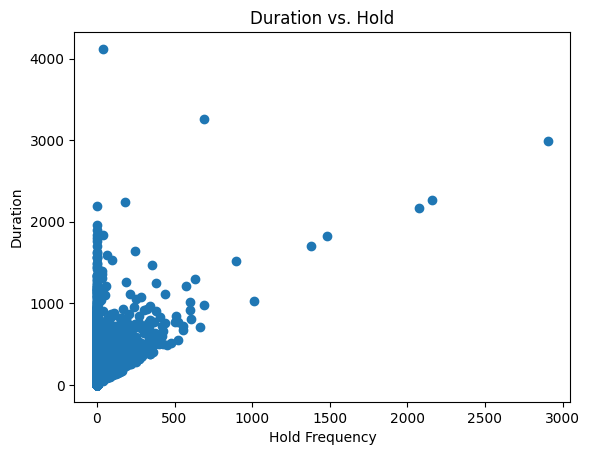

In [36]:
plt.scatter(df['h'],df['d'] )
plt.xlabel('Hold Frequency')
plt.ylabel('Duration')
plt.title('Duration vs. Hold')
plt.show()


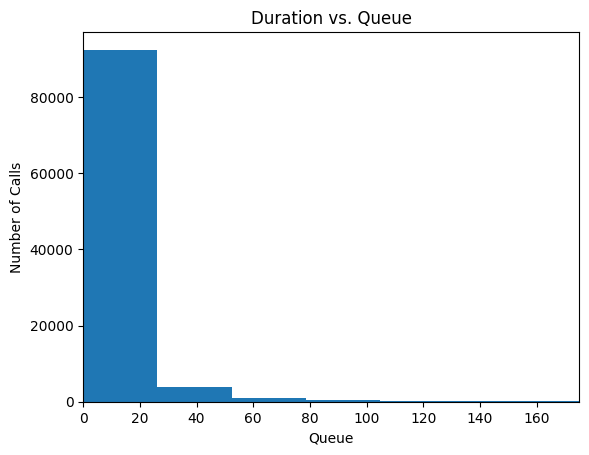

In [9]:
plt.hist(df['q'])
plt.xlabel('Queue')
plt.ylabel('Number of Calls')
plt.title('Duration vs. Queue')
plt.xlim(0,175)
plt.show()


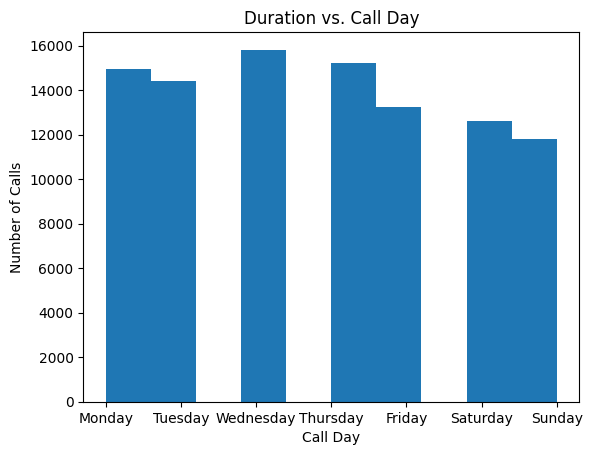

In [20]:
plt.hist(df['cd'])
plt.xlabel('Call Day')
plt.ylabel('Number of Calls')
plt.title('Duration vs. Call Day')
plt.show()

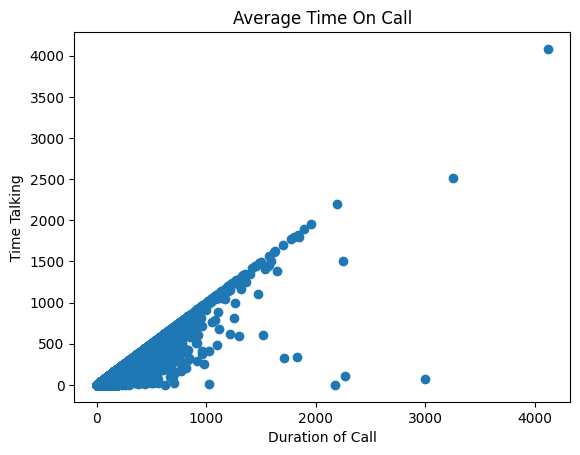

In [37]:
plt.scatter(df['d'],df['t'])
plt.title('Average Time On Call')
plt.ylabel('Time Talking')
plt.xlabel('Duration of Call')
plt.show()

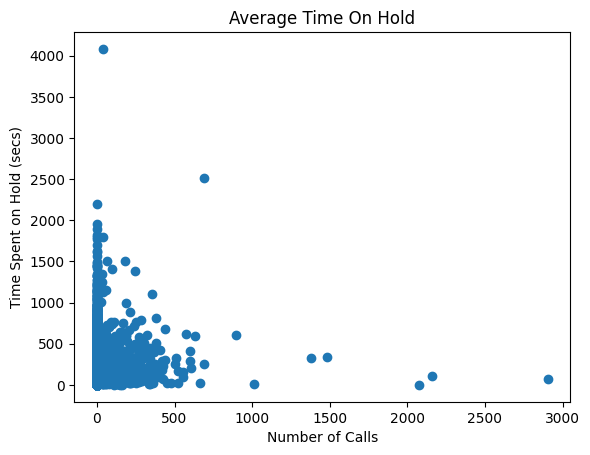

In [38]:
plt.scatter(df['h'],df['t'])
plt.xlabel("Number of Calls")
plt.ylabel('Time Spent on Hold (secs)')
plt.title('Average Time On Hold')
plt.show()